In [ ]:
!pip install lingtrain_aligner
!pip install razdel
!pip install dateparser
!pip install sentence_transformers
!pip install more_itertools
!pip install hf_xet
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from IPython.utils import io
import torch
import time
from torch import optim
from torch.nn import functional as F
import shutil
import pickle
import os
import re

with io.capture_output() as captured:
  !pip install transformers sentencepiece sentence_transformers xmltodict pypinyin pykakasi

from sentence_transformers import SentenceTransformer, SentencesDataset, LoggingHandler, losses
from sentence_transformers.readers import InputExample
from sentence_transformers.evaluation import SentenceEvaluator
from torch.utils.data import DataLoader
from datetime import datetime
import math

from transformers import AutoTokenizer, AutoModel, get_linear_schedule_with_warmup
from torch.optim import AdamW
from tqdm.notebook import tqdm

In [ ]:
import tensorflow as tf

In [ ]:
from lingtrain_aligner import splitter, aligner, resolver, metrics

In [ ]:
dog_ru_path = 'Dog_ru.txt'
dog_kum_path = 'Dog_kum.txt'

with open(dog_ru_path, 'r', encoding='utf-8') as f:
    dog_ru = f.read()
    print(dog_ru)

with open(dog_kum_path, 'r', encoding='utf-8') as f:
    dog_kum = f.read()
    print(dog_kum)

Когда-то на Алтае жил большой народ. Люди на этой земле были с добрыми помыслами, работящими, ловкими. Кругом на лесах, долинах было много ягод, орехов, съедобных грибов. В реках полно рыб. В лесу много разных зверей и птиц. Народ был с весёлым нравом и жил богато. По праздникам для хозяев священных гор и рек они делали жертвоприношения. Почитали ушедших в иной мир предков. Так же благодарили Бога за хорошую жизнь. Так и проходило время. Но вот однажды наступило тяжёлое время – настали очень жаркие дни. В степи пожелтели зелёные травы, в горах деревья стали сохнуть. На земле стали сохнуть ягоды, грибы. Вода в реках обмелела и высохла. Погибла вся рыба. Из тайги ушли звери, улетели птицы. Наступило голодное время. Стали люди болеть и умирать от голода. Тогда старейшины народа, надев свои белые одежды, собрав людей, поднялись на священные горы и стали просить Бога, чтобы народ остался жить на земле. «Мы жили с твоей помощью богато, весело. Теперь погибаем от зноя и голода. Оставь нас и н

In [ ]:
dog_ru

'Когда-то на Алтае жил большой народ. Люди на этой земле были с добрыми помыслами, работящими, ловкими. Кругом на лесах, долинах было много ягод, орехов, съедобных грибов. В реках полно рыб. В лесу много разных зверей и птиц. Народ был с весёлым нравом и жил богато. По праздникам для хозяев священных гор и рек они делали жертвоприношения. Почитали ушедших в иной мир предков. Так же благодарили Бога за хорошую жизнь. Так и проходило время. Но вот однажды наступило тяжёлое время – настали очень жаркие дни. В степи пожелтели зелёные травы, в горах деревья стали сохнуть. На земле стали сохнуть ягоды, грибы. Вода в реках обмелела и высохла. Погибла вся рыба. Из тайги ушли звери, улетели птицы. Наступило голодное время. Стали люди болеть и умирать от голода. Тогда старейшины народа, надев свои белые одежды, собрав людей, поднялись на священные горы и стали просить Бога, чтобы народ остался жить на земле. «Мы жили с твоей помощью богато, весело. Теперь погибаем от зноя и голода. Оставь нас и 

In [ ]:
lang_from = 'kum'
lang_to = 'ru'
db_path = "Cat_bread.db"

splitted_from = splitter.split_by_sentences(dog_kum.split('\n'), lang_from)
splitted_to = splitter.split_by_sentences(dog_ru.split('\n'), lang_to)
aligner.fill_db(db_path, lang_from, lang_to, splitted_from, splitted_to)

In [ ]:
print(f'Предложения kum: {len(splitted_from)}    Предложения ru: {len(splitted_to)}')

Предложения kum: 53    Предложения ru: 52


In [ ]:
for i in range(len(splitted_from)):
  new_line = '\n'
  print(f'en: {splitted_from[i]}{new_line}ru: {splitted_to[i]}')

en: Качан – качандаа Алтайда ньаан калык чаткан.
ru: Когда-то на Алтае жил большой народ.
en: Ол черде кижилер чакшы сагыштыг, ишпекчи, ус колыг, чалтанбас аҥчылар полгон.
ru: Люди на этой земле были с добрыми помыслами, работящими, ловкими.
en: Анар чатчын черде айлантыра кырларныҥ идегинде чыш аразында ильбек чийлектер, агачтарда кузук ла кижи чийтен мешкелер ӧскен.
ru: Кругом на лесах, долинах было много ягод, орехов, съедобных грибов.
en: Айрыларда ползо толо ло палык.
ru: В реках полно рыб.
en: Аба чышта кӧп аҥнар пасып, куштар ӱчип чӧрген.
ru: В лесу много разных зверей и птиц.
en: Ол калык сӧништиг, пай чаткан.
ru: Народ был с весёлым нравом и жил богато.
en: Пайрам сайын анар актыг тагларга, сӱглер эзине тайылга иткенер.
ru: По праздникам для хозяев священных гор и рек они делали жертвоприношения.
en: Ээске парган ада – аналарыны тооп кӱндӱлеп чӱргенер.
ru: Почитали ушедших в иной мир предков.
en: Чадынары чакшы учын кудайларыны алгыштап чатканар.
ru: Так же благодарили Бога за

IndexError: list index out of range

In [ ]:
splitted_to

['Когда-то на Алтае жил большой народ.',
 'Люди на этой земле были с добрыми помыслами, работящими, ловкими.',
 'Кругом на лесах, долинах было много ягод, орехов, съедобных грибов.',
 'В реках полно рыб.',
 'В лесу много разных зверей и птиц.',
 'Народ был с весёлым нравом и жил богато.',
 'По праздникам для хозяев священных гор и рек они делали жертвоприношения.',
 'Почитали ушедших в иной мир предков.',
 'Так же благодарили Бога за хорошую жизнь.',
 'Так и проходило время.',
 'Но вот однажды наступило тяжёлое время – настали очень жаркие дни.',
 'В степи пожелтели зелёные травы, в горах деревья стали сохнуть.',
 'На земле стали сохнуть ягоды, грибы.',
 'Вода в реках обмелела и высохла.',
 'Погибла вся рыба.',
 'Из тайги ушли звери, улетели птицы.',
 'Наступило голодное время.',
 'Стали люди болеть и умирать от голода.',
 'Тогда старейшины народа, надев свои белые одежды, собрав людей, поднялись на священные горы и стали просить Бога, чтобы народ остался жить на земле.',
 '«Мы жили с 

In [ ]:
# model = AutoModel.from_pretrained("sentence-transformers/LaBSE", from_tf=True)

In [ ]:
model = AutoModel.from_pretrained("sentence-transformers/LaBSE", from_tf=True)

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

In [ ]:
aligner.align_db(db_path,
                model_name="sentence_transformer_multilingual_labse",
                batch_size=25,
                window=6,
                batch_ids=[],
                save_pic=False,
                embed_batch_size=5,
                normalize_embeddings=True,
                show_progress_bar=True,
                shift=0)

Aligning without segments.
tasks amount: 3
batch: 0 (0)
Loading LaBSE model from Internet.


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

2_Dense/pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

Batches:   0%|          | 0/5 [00:00<?, ?it/s]

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

batch: 1 (1)


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

batch: 2 (2)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
from lingtrain_aligner import vis_helper

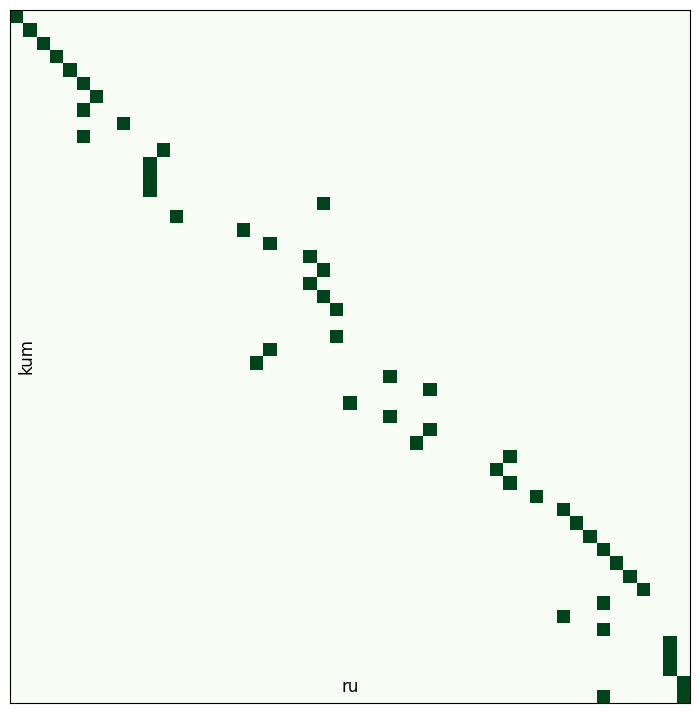

score: 0.3653846153846154


In [ ]:
vis_helper.visualize_alignment_by_db(db_path,
        output_path="alignment_vis.png",
        batch_size=60,
        size=(900,900),
        lang_name_from=lang_from,
        lang_name_to=lang_to,
        batch_ids=[],
        plt_show=True,
        show_info=False)

print("score:", metrics.chain_score(db_path))


In [ ]:
conflicts_to_solve, rest = resolver.get_all_conflicts(db_path, min_chain_length=2, max_conflicts_len=10)

conflicts to solve: 2
total conflicts: 5


In [ ]:
steps = 3
model_name="sentence_transformer_multilingual_labse"

for i in range(steps):
    conflicts, rest = resolver.get_all_conflicts(db_path,
                        min_chain_length=2+i,
                        max_conflicts_len=10*(i+1),
                        batch_id=-1)

    resolver.resolve_all_conflicts(db_path, conflicts, model_name, show_logs=False)

    if len(rest) == 0:
        break

conflicts to solve: 2
total conflicts: 5


100%|██████████| 2/2 [00:00<00:00,  5.74it/s]


conflicts to solve: 2
total conflicts: 2


100%|██████████| 2/2 [00:00<00:00,  3.97it/s]


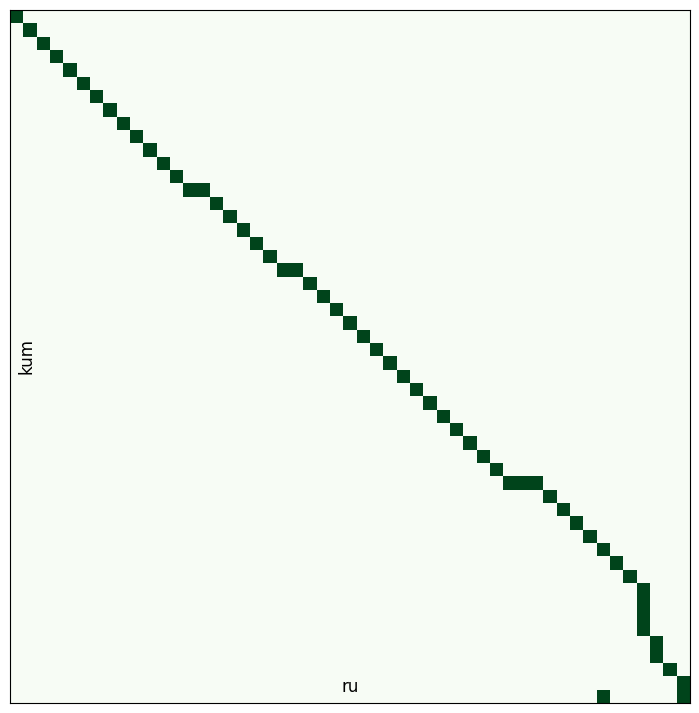

score: 0.9811320754716981


In [ ]:
vis_helper.visualize_alignment_by_db(db_path,
        output_path="alignment_vis.png",
        batch_size=100,
        size=(900,900),
        lang_name_from=lang_from,
        lang_name_to=lang_to,
        batch_ids=[],
        plt_show=True,
        show_info=False)

print("score:", metrics.chain_score(db_path))

In [ ]:
import sqlite3
import pandas as pd

# Путь к файлу .db
db_path = "Cat_bread.db"  # Например: "aligner_output.db"

# Подключение к базе данных
conn = sqlite3.connect(db_path)

In [ ]:
cursor = conn.cursor()
cursor.execute("SELECT * FROM splitted_to;")
tables = cursor.fetchall()
cursor.execute("SELECT * FROM splitted_from;")
table = cursor.fetchall()

print("Таблицы в базе данных:", tables[0][1], len(tables))
print("Таблицы в базе данных:", table[0][1], len(table))

Таблицы в базе данных: Когда-то на Алтае жил большой народ. 52
Таблицы в базе данных: Качан – качандаа Алтайда ньаан калык чаткан. 53


In [ ]:
help(saver.save_plain_text)

NameError: name 'saver' is not defined

In [ ]:
from lingtrain_aligner import saver

output_path="/content"

saver.save_plain_text(db_path, os.path.join(output_path, f"corpora_{lang_from}.txt"), side="from", batch_ids=[])
saver.save_plain_text(db_path, os.path.join(output_path, f"corpora_{lang_to}.txt"), side="to", batch_ids=[])


In [ ]:
saver.save_tmx(db_path, os.path.join(output_path, f"corpora.tmx"), lang_from, lang_to)